Accuracy of the model 1.0
Classification report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00     72192

    accuracy                           1.00     72192
   macro avg       1.00      1.00      1.00     72192
weighted avg       1.00      1.00      1.00     72192



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


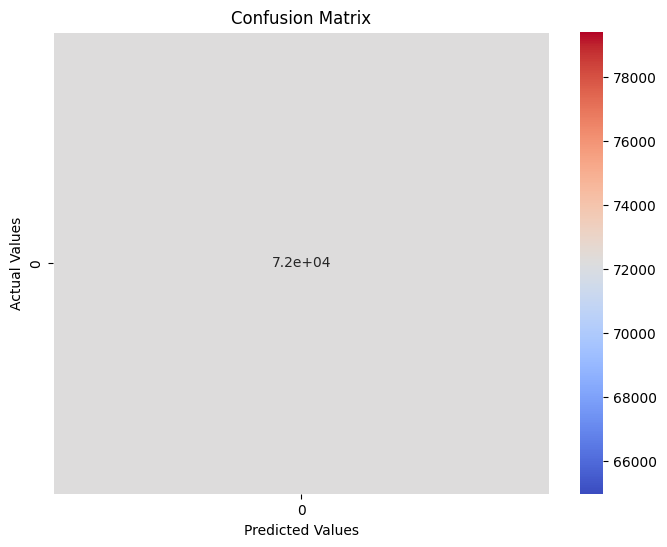

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


df=pd.read_csv('/content/Netflix.csv',encoding='ISO-8859-1')

#drop unnecessary columns
df['Top10']=df['weekly_rank'].apply(lambda x: 1 if x<=10 else 0)
df=df.drop(['weekly_rank','show_title','season_title','week'],axis=1)

#encode categorical features
encoded_data=pd.get_dummies(df, drop_first=True)
Features=encoded_data.drop('Top10',axis=1)
Target=encoded_data['Top10']

#create training and testing sets
train_X,test_X,train_Y,test_Y=train_test_split(Features,Target,test_size=0.3,random_state=45)
classifier=RandomForestClassifier(random_state=45)
classifier.fit(train_X,train_Y)

#make predictions
prediction=classifier.predict(test_X)
print("Accuracy of the model",accuracy_score(test_Y,prediction))
print("Classification report:\n", classification_report(test_Y,prediction))

plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(test_Y,prediction), annot=True, cmap="coolwarm",linewidth=0.5)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()



